In [2]:
import dynet as dy
import numpy as np
from time import time

In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [4]:
#export
from exp.nb_00 import *
import operator

def test(a,b,cmp,cname=None):
    if cname is None: cname=cmp.__name__
    assert cmp(a,b),f"{cname}:\n{a}\n{b}"

def test_eq(a,b): test(a,b,operator.eq,'==')

In [5]:
#export
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'

In [6]:
dy_params = dy.DynetParams()
dy_params.init()
dy_params.set_autobatch(True)

In [7]:
test_eq(TEST, 'test')

In [8]:
path = datasets.download_data(MNIST_URL, ext='.gz'); path

PosixPath('/home/shukistern/.fastai/data/mnist.pkl.gz')

In [47]:
with gzip.open(path, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [48]:
inp = lambda t: dy.inputTensor(t[:50].transpose(), batched=True)
x_train, y_train, x_valid, y_valid = map(dy.inputTensor, (x_train, y_train, x_valid, y_valid))

In [11]:
c, n = x_train.npvalue().shape

In [51]:
mpl.rcParams['image.cmap'] = 'gray'

In [56]:
img = x_train[:,0]
img = dy.reshape(img, (28,28))

AttributeError: 'int' object has no attribute 'step'

TypeError: Invalid shape (50000,) for image data

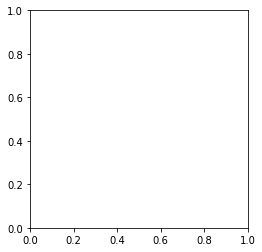

In [55]:
plt.imshow(img.value())

In [32]:
w1 = dy.random_normal((784, 10))
b1 = dy.zeroes((1, 10))
w1.value(), b1.value()

ValueError: Failed dimension check in MatrixMultiply::forward

In [26]:
#m = dy.ParameterCollection()
#w = m.add_parameters((784, 10), init='normal')
#b = m.add_parameters((50, 10), init=0)

In [29]:
def get_param(collection, i):
    return collection.parameters_list()[i]

In [22]:
x_train.dim()

((784,), 50)

In [28]:
z = (w*x_train + b)

In [29]:
t0 = time()
z.value()
print((time() - t0)*10**6)

ValueError: Failed dimension check in MatrixMultiply::forward

In [15]:
tb = torch.zeros(10)
tw = torch.randn(784, 10)
tx = torch.Tensor(x_train[:5].value())

In [16]:
%timeit tz = tx.matmul(tw) + tb 

11 µs ± 161 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [18]:
%timeit (x_train[:5]*w + b).value()

139 µs ± 3.27 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [42]:
class Model(object):
    def __init__(self, in_dim=784, hid_dim=128, out_dim=10):
        super().__init__()
        self.collection = dy.ParameterCollection()
        self.w1 = self.collection.add_parameters((in_dim, hid_dim))
        self.b1 = self.collection.add_parameters((hid_dim))
        self.w2 = self.collection.add_parameters((hid_dim, out_dim))
        self.b2 = self.collection.add_parameters((out_dim))
        
    def __call__(self, x):
        return x*self.w1 + self.b1

In [43]:
m = Model()

In [53]:
m(x_train[:1])

expression 243387/0

In [56]:
m.collection.parameters_list()

[Parameter /_0, Parameter /_1, Parameter /_2, Parameter /_3]